In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import random

import warnings
warnings.filterwarnings("ignore")

from zwad.ad.preprocess import load_dataset
from zwad.ad.postprocess import load_ad_tables_by_patterns

In [2]:
# Load M31 data

m31_oid, m31_features = load_dataset('../data/oid_m31.dat', '../data/feature_m31.dat', '../data/feature_m31.name')
m31 = pd.DataFrame(m31_features, index=m31_oid)
m31

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
695211400017839,0.699500,0.227941,0.036765,0.128972,1.576097,4.729054e+09,0.212000,0.450199,3.944156,-1.639586e-03,...,0.148243,0.038084,0.959692,1.045485,9.733143,1.391858,-1.312442,0.202145,0.664184,20.516939
695211400043887,0.443000,0.288889,0.044444,0.179944,1.524735,3.644123e+09,0.204000,0.400000,0.133404,-5.124543e-06,...,0.156987,0.032495,0.875076,0.984689,10.104938,0.548229,-0.357512,0.163288,0.792986,20.698317
695211400043454,0.589499,0.280000,0.032000,0.191169,1.652675,2.317022e+09,0.204500,0.484001,1.439840,4.769120e-05,...,0.144973,0.031337,0.856762,0.939969,7.261847,0.791332,-0.746378,0.190502,0.728758,20.749649
695211400042791,0.604000,0.261745,0.053691,0.158801,1.574722,1.996893e+09,0.203499,0.433001,1.735631,8.042025e-04,...,0.159723,0.033665,0.761747,0.886971,8.016976,0.915853,-0.816090,0.178804,0.737000,20.493862
695211400016239,0.825500,0.196203,0.025316,0.085341,1.951849,2.571876e+09,0.155001,0.323599,18.212532,-2.264037e-03,...,0.176922,0.049399,0.618860,0.638475,5.355614,1.734685,-2.598536,0.162091,0.504324,20.329548
695211400130636,0.755000,0.291262,0.058252,0.148561,1.811533,1.787588e+09,0.318750,0.667599,0.975436,1.491155e-03,...,0.156039,0.018062,0.833467,0.760654,4.957766,2.412186,-0.025336,0.272547,0.717568,20.293999
695211400020822,0.359000,0.281407,0.035176,0.069087,1.919766,6.825739e+09,0.112000,0.235802,2.859599,3.075226e-04,...,0.143250,0.033057,0.756206,0.748621,6.893010,0.643574,-0.822030,0.097358,0.714303,19.775906
695211400046489,0.721500,0.234234,0.063063,0.167082,1.860691,2.305156e+09,0.232500,0.448801,2.767556,4.084874e-04,...,0.148862,0.041687,0.925770,0.865271,4.546683,0.974015,-0.698955,0.211857,0.703871,20.806570
695211400042524,0.478499,0.252174,0.052174,0.140025,1.571182,4.056119e+09,0.197001,0.454000,0.678151,2.702705e-04,...,0.165747,0.045740,0.767731,0.815489,8.178713,0.579579,-0.335617,0.183544,0.754838,20.912270
695211400044584,0.410000,0.270115,0.063218,0.140093,1.624443,2.278564e+09,0.178999,0.373301,0.479148,1.255354e-04,...,0.164841,0.032915,0.852562,0.901200,11.398070,0.676003,-0.521176,0.151585,0.767441,20.379196


In [3]:
# Lead full expert list of anomalies with comments, indexed by anomalies oid

m31_maria_list = pd.read_csv('../data/m31_maria.csv')
m31_maria_list = m31_maria_list.set_index('oid')
m31_maria_list

,#,tag,tag_detailed,Comments,Unnamed: 5
oid,,,,,
695211400034403,0,artefact,bright star,NaN,NaN
695211400124577,1,artefact,bright star,NaN,NaN
695211400102351,2,artefact,bright star,NaN,NaN
695211400053697,3,artefact,bright star,NaN,NaN
695211200075348,4,Var,NaN,MASTER OT J004126.22+414350.0 (ATel #9470). Th...,NaN
695211400000352,5,artefact,bright star,NaN,NaN
695211400088968,6,artefact,NaN,empty field fits,NaN
695211400117334,7,artefact,bright star,NaN,NaN
695211400028274,8,artefact,bright star,NaN,NaN


In [4]:
# From full data list (M31), only select oid that match those in expert anomalies list

m31_out = m31.loc[m31_maria_list.index]
m31_out.to_csv('../data/m31_outliers_table.csv')
m31_out

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
oid,,,,,,,,,,,,,,,,,,,,,
695211400034403,2.380000,0.293706,0.048951,0.210137,1.039928,1.205708e+09,1.702999,2.813601,-0.436671,-0.000443,...,0.118531,0.011458,0.861847,1.873147,28.882809,1568.272339,0.410859,1.097088,0.875042,16.457632
695211400124577,2.044500,0.358025,0.006173,0.203197,1.588497,2.624290e+09,1.459000,3.120001,-0.784893,-0.003234,...,0.112881,0.019039,0.824700,0.893768,9.279490,1209.481201,0.397880,1.082259,0.903058,16.626255
695211400102351,2.362000,0.396694,0.024793,0.155299,1.549895,2.136628e+09,1.404751,3.065599,-0.579718,0.001458,...,0.144106,0.022466,0.992880,0.968951,8.050076,747.957153,0.321721,1.132575,0.900563,17.092886
695211400053697,2.212500,0.310000,0.080000,0.229030,1.349776,4.898475e+08,1.032000,2.337502,0.153038,0.000263,...,0.182627,0.026980,1.074533,0.876942,4.537641,1371.101685,0.280188,0.917519,0.851317,16.688284
695211200075348,1.108000,0.458333,0.013889,0.400897,0.117357,2.367448e+07,1.024000,1.484999,-1.029066,0.017021,...,0.101488,0.048847,0.894277,2.820131,63.978363,12.322401,0.163349,0.557800,0.902715,20.001472
695211400000352,2.400000,0.288288,0.045045,0.160094,1.602353,9.396195e+08,1.299751,2.475200,0.269096,-0.001185,...,0.143338,0.017688,0.736078,1.019456,9.457602,1488.709473,0.583173,0.983108,0.864887,16.493820
695211400088968,1.766000,0.335938,0.015625,0.237473,0.970532,6.698904e+08,1.466000,2.213600,-0.972853,0.001522,...,0.171669,0.024452,0.879558,1.562311,14.599635,617.243286,0.366902,0.866335,0.870992,17.032112
695211400117334,2.017000,0.304000,0.040000,0.225917,1.219688,1.659339e+09,1.389252,2.385000,0.346864,-0.001382,...,0.152174,0.012302,0.955405,1.669254,18.446514,564.353943,0.899401,0.931375,0.892021,17.024920
695211400028274,2.113000,0.318519,0.044444,0.155424,1.620563,1.274164e+09,1.290501,2.348999,-0.431219,-0.001148,...,0.158261,0.011947,1.023619,1.243340,12.130541,1059.956909,-0.033797,0.905951,0.876673,16.931715


# Create final table with tag comments like artefact

In [5]:
# Combine features data in anomalies with associated comments/tags
m31_final_out = pd.concat([m31_out, m31_maria_list], axis=1)
m31_final_out.to_csv('../data/m31_anomalies_table_with_tags.csv')
m31_final_out

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,chi2,skew,standard_deviation,stetson_K,weighted_mean,#,tag,tag_detailed,Comments,Unnamed: 5
oid,,,,,,,,,,,,,,,,,,,,,
695211400034403,2.380000,0.293706,0.048951,0.210137,1.039928,1.205708e+09,1.702999,2.813601,-0.436671,-0.000443,...,1568.272339,0.410859,1.097088,0.875042,16.457632,0,artefact,bright star,NaN,NaN
695211400124577,2.044500,0.358025,0.006173,0.203197,1.588497,2.624290e+09,1.459000,3.120001,-0.784893,-0.003234,...,1209.481201,0.397880,1.082259,0.903058,16.626255,1,artefact,bright star,NaN,NaN
695211400102351,2.362000,0.396694,0.024793,0.155299,1.549895,2.136628e+09,1.404751,3.065599,-0.579718,0.001458,...,747.957153,0.321721,1.132575,0.900563,17.092886,2,artefact,bright star,NaN,NaN
695211400053697,2.212500,0.310000,0.080000,0.229030,1.349776,4.898475e+08,1.032000,2.337502,0.153038,0.000263,...,1371.101685,0.280188,0.917519,0.851317,16.688284,3,artefact,bright star,NaN,NaN
695211200075348,1.108000,0.458333,0.013889,0.400897,0.117357,2.367448e+07,1.024000,1.484999,-1.029066,0.017021,...,12.322401,0.163349,0.557800,0.902715,20.001472,4,Var,NaN,MASTER OT J004126.22+414350.0 (ATel #9470). Th...,NaN
695211400000352,2.400000,0.288288,0.045045,0.160094,1.602353,9.396195e+08,1.299751,2.475200,0.269096,-0.001185,...,1488.709473,0.583173,0.983108,0.864887,16.493820,5,artefact,bright star,NaN,NaN
695211400088968,1.766000,0.335938,0.015625,0.237473,0.970532,6.698904e+08,1.466000,2.213600,-0.972853,0.001522,...,617.243286,0.366902,0.866335,0.870992,17.032112,6,artefact,NaN,empty field fits,NaN
695211400117334,2.017000,0.304000,0.040000,0.225917,1.219688,1.659339e+09,1.389252,2.385000,0.346864,-0.001382,...,564.353943,0.899401,0.931375,0.892021,17.024920,7,artefact,bright star,NaN,NaN
695211400028274,2.113000,0.318519,0.044444,0.155424,1.620563,1.274164e+09,1.290501,2.348999,-0.431219,-0.001148,...,1059.956909,-0.033797,0.905951,0.876673,16.931715,8,artefact,bright star,NaN,NaN


# LOOKING AT PHASE SPACES WITH EXPERT TAGS

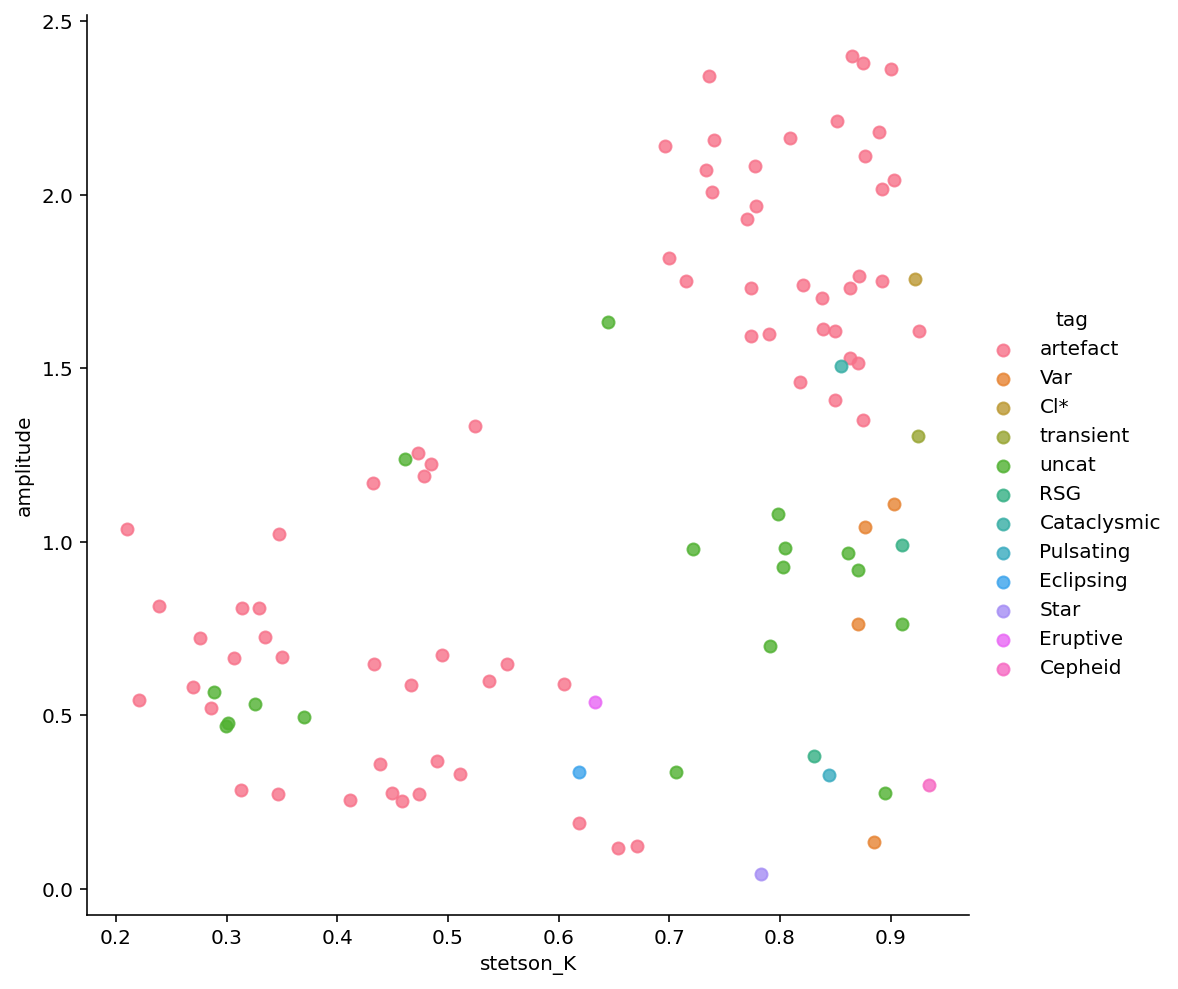

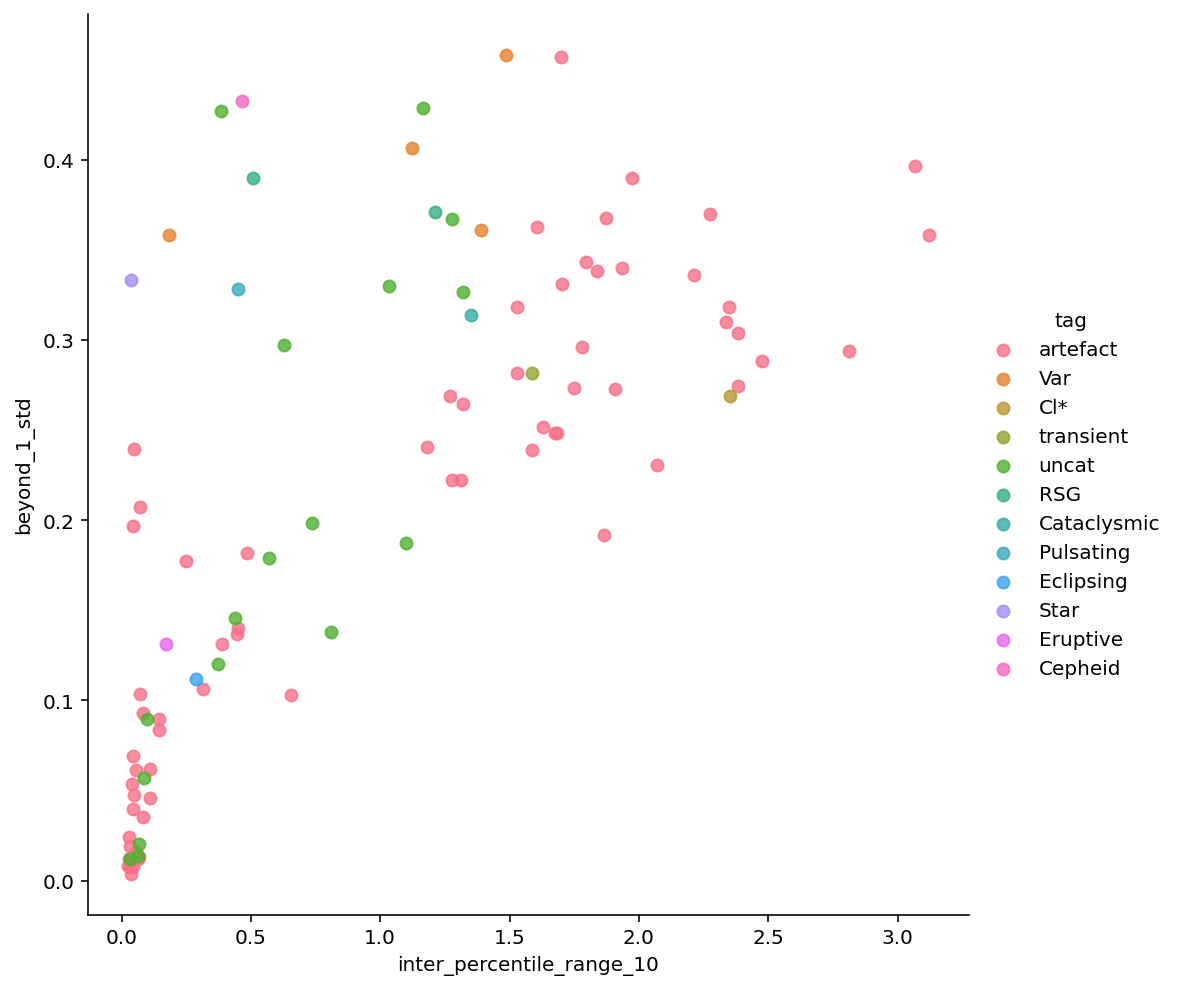

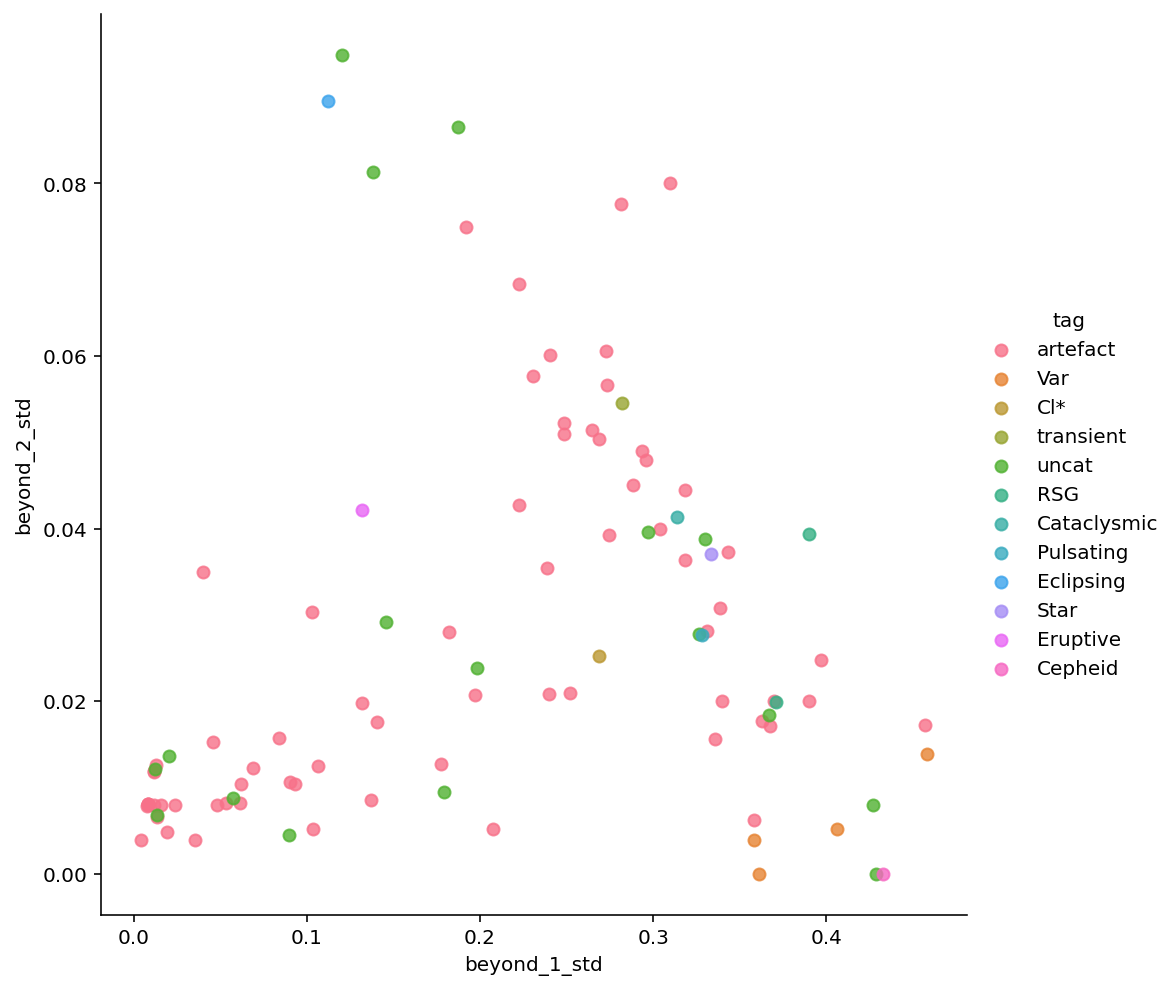

In [6]:
#plotting semi random phase spaces...

import seaborn as sns

df = m31_final_out

rs = random.Random(42)  #set random seed to 42 to reproducibility

for i in m31_out.columns[0:3]: #use col of data table with only features. Do only 3 columns for space
    
    f1 = rs.choice(m31_out.columns)

    sns.lmplot(x='{}'.format(f1), y='{}'.format(i), data=df, fit_reg=False, hue='tag', legend=True,
          height=7)

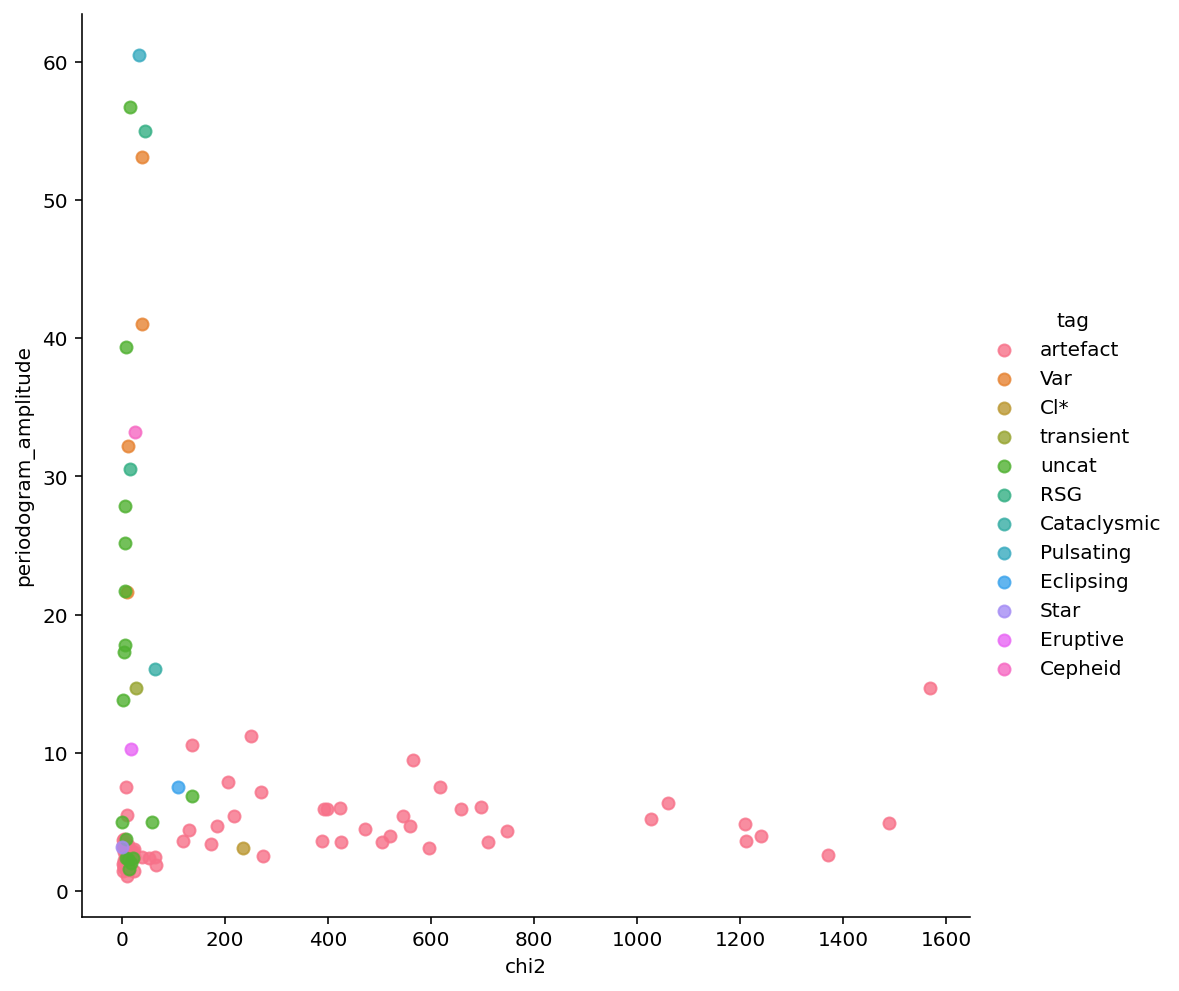

In [7]:
# a potentially decent phase space to use in paper

import seaborn as sns

df = m31_final_out
 
sns.lmplot(x="chi2", y="periodogram_amplitude", data=df, fit_reg=False, hue='tag', legend=True,
          height=7)


#set plot params
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12

#plt.savefig('../figs/phase_spaces/chi2_periodamp_phase_space_plot.png', format='png', dpi=300, bbox_inches='tight')

# Make combined M31 all data scatter + M31 anomalies only

In [8]:
m31_final_anom = m31_final_out.loc[m31_final_out.tag != 'artefact']
m31_final_anom

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,chi2,skew,standard_deviation,stetson_K,weighted_mean,#,tag,tag_detailed,Comments,Unnamed: 5
oid,,,,,,,,,,,,,,,,,,,,,
695211200075348,1.108000,0.458333,0.013889,0.400897,0.117357,2.367448e+07,1.024000,1.484999,-1.029066,0.017021,...,12.322401,0.163349,0.557800,0.902715,20.001472,4,Var,NaN,MASTER OT J004126.22+414350.0 (ATel #9470). Th...,NaN
695211400053352,1.759000,0.268908,0.025210,0.150458,1.615414,5.872777e+09,1.376499,2.351000,-0.838848,-0.000361,...,234.849213,-0.536567,0.913956,0.922313,17.916967,10,Cl*,NaN,Part of the Cl*; bright star nearby; artefact?,NaN
695211100022045,1.306000,0.281818,0.054545,0.372344,0.192495,1.275634e+08,0.508999,1.586000,0.093616,0.015123,...,27.740152,-1.034228,0.584109,0.925093,19.562902,12,transient,PNV,"2017-10-29; AT 2017ixs, 2017-12-15; MATER 20...",NaN
695211200058391,1.080000,0.330097,0.038835,0.395421,0.336107,9.694134e+07,0.565500,1.034199,0.377343,-0.017752,...,3.478692,0.811280,0.415326,0.798510,20.626154,16,uncat,NaN,Variable; red star; in Gaia list,NaN
695211400121607,1.044000,0.361111,0.000000,0.435610,0.365767,7.381361e+08,0.948000,1.390501,-1.225616,0.010255,...,8.932074,0.155026,0.562205,0.877161,20.012375,18,Var,NaN,[JPN2003] V206,NaN
695211200035023,0.919500,0.187500,0.086538,0.372327,0.135560,2.203743e+08,0.467499,1.099400,1.052788,-0.002589,...,8.496761,1.292874,0.393981,0.870150,19.604841,20,uncat,NaN,Variable; red star; IrS; in Gaia list,NaN
695211400009049,0.763500,0.428571,0.000000,0.438763,0.194513,7.228933e+07,0.808002,1.165998,-1.336752,0.011980,...,5.552580,-0.282411,0.444718,0.910447,20.274681,21,uncat,NaN,Variable; red star; in Gaia list,NaN
695211400070144,0.763000,0.406250,0.005208,0.401009,0.054155,1.422277e+08,0.557999,1.121000,-0.859215,-0.008022,...,38.527668,-0.230873,0.383597,0.870191,18.670090,23,Var,NaN,NaN,NaN
695211100003383,0.992500,0.370861,0.019868,0.391718,0.171532,1.854405e+08,0.525002,1.212601,-0.608734,-0.010283,...,16.313511,-0.224307,0.450723,0.909915,19.553740,24,RSG,NaN,NaN,NaN


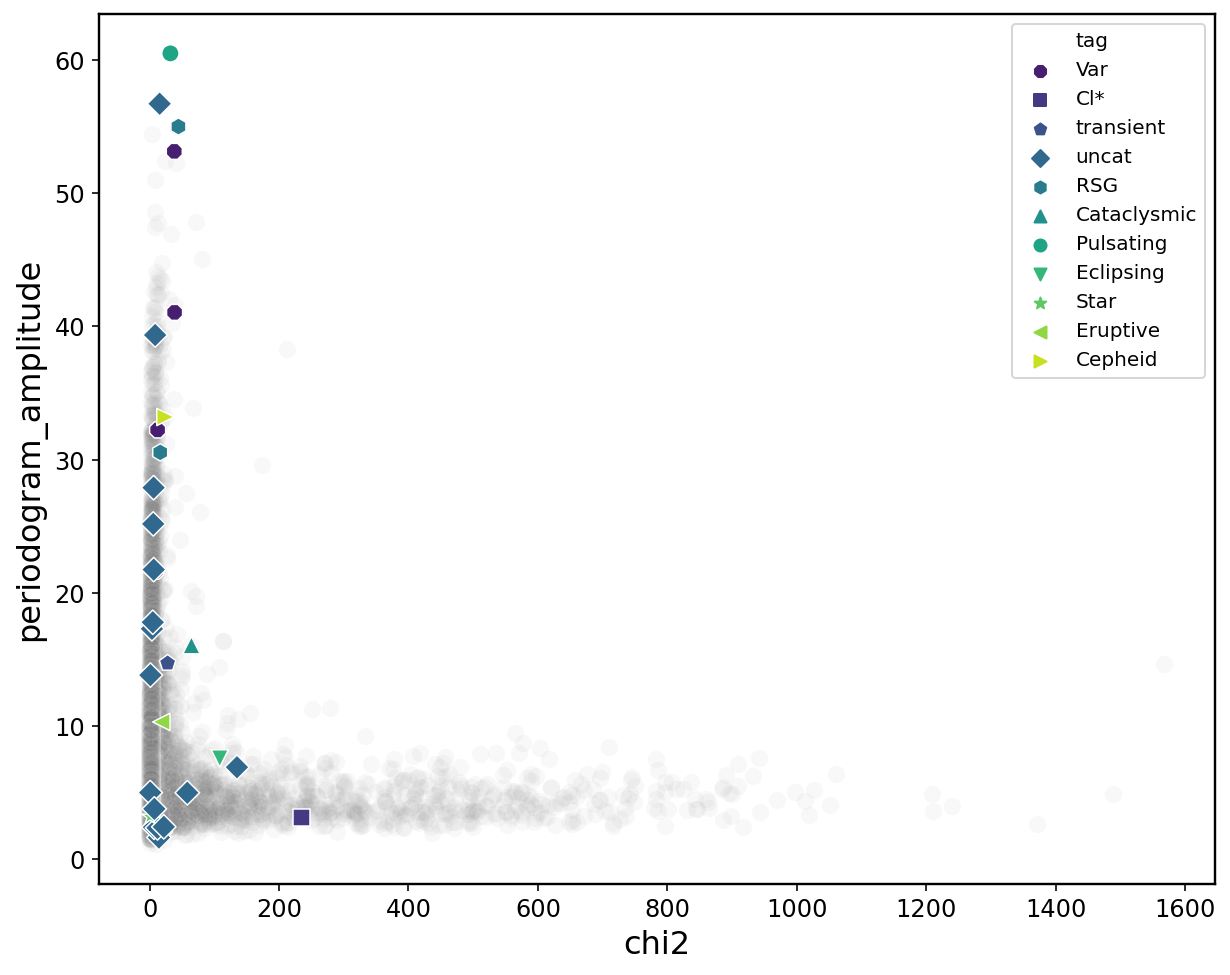

In [9]:
fig, ax = plt.subplots(figsize=(10,8))

markers = {"Var": "8", "Cl*": "s", "transient": "p", "uncat": "D", "RSG": "h", "Cataclysmic": "^",
           "Pulsating": "o", "Eclipsing": "v", "Star": "*", "Eruptive": "<", "Cepheid": ">"}

sns.scatterplot(x="chi2", y="periodogram_amplitude", data=m31, marker="o", color='grey', s=75, alpha=0.05)
sns.scatterplot(x="chi2", y="periodogram_amplitude", data=m31_final_anom, markers=markers, 
                style='tag', hue='tag', palette="viridis", s=75)

#set plot params
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12

#plt.savefig('../figs/phase_spaces/chi2_periodamp_m31_vs_anom.png', format='png', dpi=300, bbox_inches='tight')

# Repeat above but now all m31 vs outliers (artefacts + anomalies)

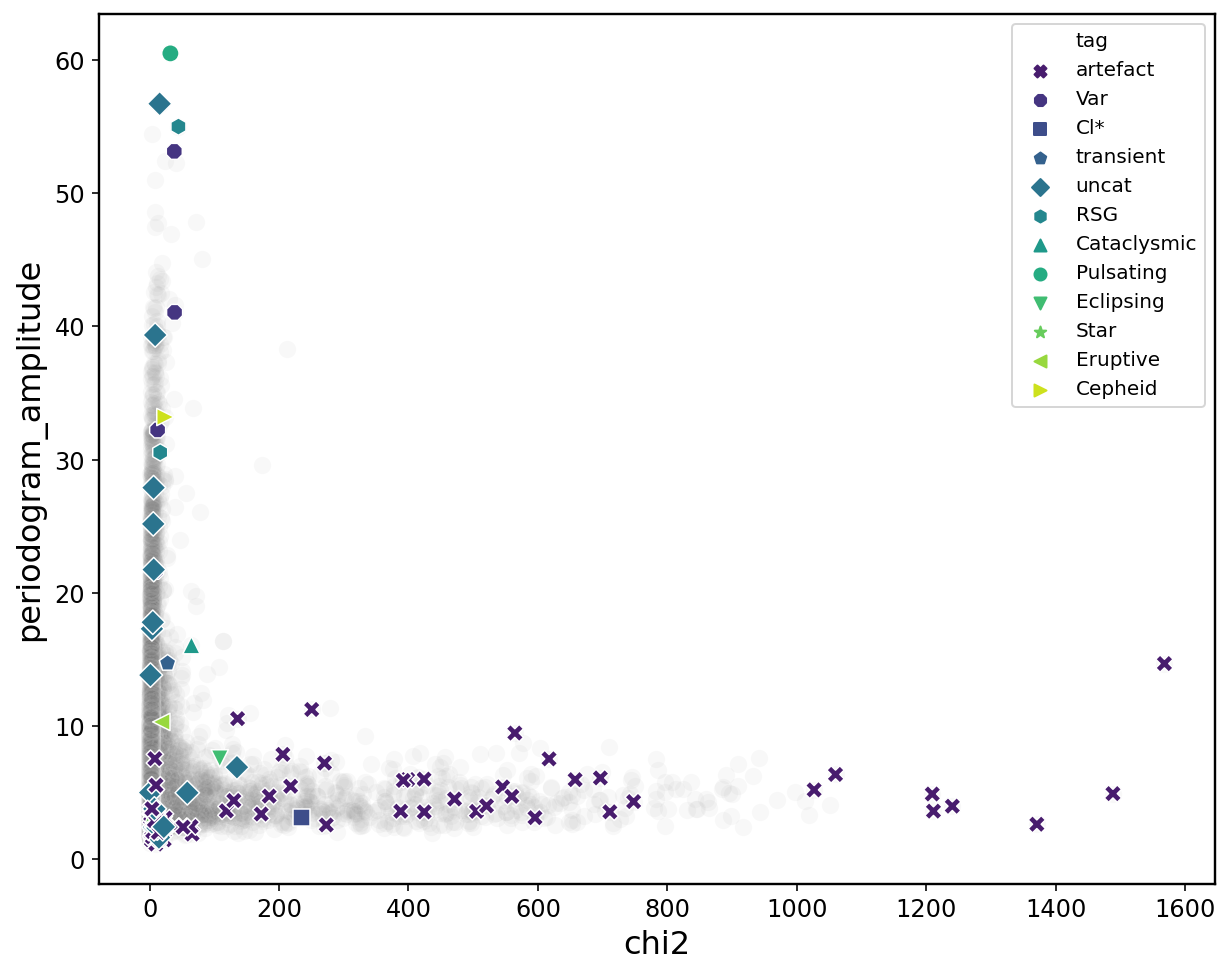

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

markers = {"artefact": "X", "Var": "8", "Cl*": "s", "transient": "p", "uncat": "D", "RSG": "h", "Cataclysmic": "^",
           "Pulsating": "o", "Eclipsing": "v", "Star": "*", "Eruptive": "<", "Cepheid": ">"}

sns.scatterplot(x="chi2", y="periodogram_amplitude", data=m31, marker="o", color='grey', s=75, alpha=0.05)
sns.scatterplot(x="chi2", y="periodogram_amplitude", data=m31_final_out, markers=markers, 
                style='tag', hue='tag', palette="viridis", s=75)

#set plot params
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12

plt.savefig('../figs/phase_spaces/chi2_periodamp_m31_vs_out.png', format='png', dpi=300, bbox_inches='tight')

# Try w/ Bokeh to recover objectIds -> plug into SNAD viewer for verification

In [11]:
import seaborn as sns
from bokeh.io import output_file, show,curdoc
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6
from bokeh.models import Quad, Legend
from bokeh.layouts import row, layout,widgetbox
from bokeh.models.widgets import Select,MultiSelect
from bokeh.models import ColorBar
from bokeh.plotting import ColumnDataSource,Figure,reset_output,gridplot
from bokeh.io import output_notebook # enables plot interface in J notebook
output_notebook()

source = ColumnDataSource(data=dict(objectid=np.array(m31.index),
                            chi2=np.array(m31['chi2']),
                            periodamp=np.array(m31['periodogram_amplitude']),
                           )
                 )

source2 = ColumnDataSource(data=dict(objectid=np.array(m31_final_out.index),
                            chi2=np.array(m31_final_out['chi2']),
                            periodamp=np.array(m31_final_out['periodogram_amplitude']),
                           )
                 )

# for interactive hover tool
TOOLTIPS=[
    ("ObjectID", "@objectid"),
]

plot = Figure(plot_height = 500, plot_width = 600, toolbar_location=None, tooltips=TOOLTIPS)
plot.circle(x='chi2', y='periodamp', fill_alpha=0.5, source=source, size=5, fill_color = 'grey', 
            legend='in M31', line_color=None)
plot.circle(x='chi2', y='periodamp', fill_alpha=0.5, source=source2, size=5, fill_color = 'orange', 
            legend='outlier in M31', line_color=None)


plot.xaxis.axis_label = "chi2"
plot.yaxis.axis_label = "period_amplitude"
legend = Legend(location=(0, 30))
plot.add_layout(legend)

show(plot)

Loading BokehJS ...

# Repeat chi2 vs period_amp in Deep, Disk datasets

In [12]:
# Load Deep data

deep_oid, deep_features = load_dataset('../data/oid_deep.dat', '../data/feature_deep.dat', '../data/feature_deep.name')
deep = pd.DataFrame(deep_features, index=deep_oid)
deep

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
795216100016711,0.540999,0.384615,0.038462,0.132028,1.397621,5.995161e+08,0.384998,0.626499,-0.370707,0.000028,...,0.158873,0.046190,0.988132,1.153393,12.302343,2.094434,-0.561686,0.243355,0.819022,20.531246
795216200000160,0.555500,0.309091,0.045455,0.150656,1.558752,2.858594e+09,0.257999,0.555500,0.195134,-0.000409,...,0.177428,0.015411,0.810837,0.988667,8.658415,1.084765,-0.186345,0.204943,0.773804,20.622486
795216200000423,0.682500,0.263566,0.062016,0.135337,1.415388,1.171590e+09,0.249001,0.525002,2.017293,-0.000368,...,0.137916,0.049931,0.924430,1.028984,6.990223,1.522744,-0.782636,0.212639,0.718653,20.564688
795216200021594,0.471500,0.324561,0.035088,0.120368,1.609693,1.157334e+09,0.191000,0.423700,0.339782,0.000081,...,0.154165,0.064802,1.049195,1.079942,10.374885,1.000001,-0.109285,0.165479,0.763212,20.291206
795216100016924,0.707000,0.330275,0.027523,0.222071,1.255422,1.167658e+09,0.350498,0.581999,0.391907,-0.000741,...,0.189391,0.012856,0.738287,1.210104,9.334059,1.520369,-0.238332,0.242174,0.775877,20.811619
795216100000548,0.540000,0.300613,0.049080,0.112746,1.731434,9.169341e+09,0.288250,0.477402,0.037215,-0.000210,...,0.160948,0.037974,0.835788,0.850838,5.354913,1.081656,0.020953,0.189515,0.784462,20.572588
795216200000232,0.548000,0.315385,0.023077,0.214051,1.426212,1.932081e+09,0.282999,0.584000,0.103403,-0.000162,...,0.153701,0.028748,0.840052,1.231180,9.365962,1.428506,-0.375292,0.213028,0.769695,20.477478
795216200008008,0.609500,0.274336,0.044248,0.193675,1.232561,2.911164e+09,0.253000,0.455000,1.484506,0.000689,...,0.158598,0.011352,0.870196,1.222376,10.935854,1.476483,-0.551657,0.203822,0.708554,20.443169
795216100008737,0.733000,0.330769,0.023077,0.165291,1.411366,1.788587e+09,0.329000,0.670000,1.589707,-0.000714,...,0.164725,0.030119,0.848108,1.147041,12.250195,2.614854,-0.882778,0.245478,0.727822,20.529520
795216200015513,0.512501,0.299363,0.057325,0.120831,1.633382,1.233892e+09,0.207500,0.386799,0.738721,0.000443,...,0.145941,0.035083,0.892081,0.987559,6.853754,1.057394,-0.134980,0.167110,0.760308,20.276155


In [13]:
# Lead full expert list of anomalies with comments, indexed by anomalies oid

deep_maria_list = pd.read_csv('../data/deep_maria.csv')
deep_maria_list = deep_maria_list.set_index('oid')
deep_maria_list

,#,tag,tag_detailed,Comments
oid,,,,
795203200009604,0,Сataclysmic,AM Herculis,polars
795205400022890,1,Pulsating,Mira,NaN
795206400033919,2,artefact,ghost,dispersed LC
795209300012791,3,Pulsating,RRAB,RR Lyrae variables with asymmetric light curve...
795215300016556,4,atrefact,bright star,NaN
795211200035931,5,SN,SN Ia,SN 2018coi
795205400027537,6,Mira_projected,Mira_projected,Automatic photometry artefact; due to pulsatio...
795209200003484,7,uncat,NaN,ZTF18abbpebf; SN Ia:
795212100007964,8,uncat,NaN,ZTF18aanbksg; AGN: Blazar:


In [14]:
# From full data list (Deep), only select oid that match those in expert anomalies list

deep_out = deep.loc[deep_maria_list.index]
deep_out.to_csv('../data/deep_outliers_table.csv')
deep_out

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
oid,,,,,,,,,,,,,,,,,,,,,
795203200009604,1.943000,0.368020,0.032995,0.290370,0.769578,3.887033e+08,1.351000,2.470800,-0.631400,-0.007297,...,0.113083,0.028044,0.719319,1.834713,77.674088,617.817078,-0.430643,0.906781,0.896606,17.796665
795205400022890,1.443500,0.173913,0.074534,0.368581,0.053191,4.966888e+06,0.582750,2.100601,0.673274,0.007732,...,0.101203,0.057815,0.713023,1.674084,64.805275,3962.892578,-1.378816,0.743432,0.744812,14.049537
795206400033919,2.292000,0.313043,0.060870,0.261737,1.085244,3.365883e+08,1.058500,1.896999,0.537647,0.006707,...,0.146361,0.056470,0.970831,1.397647,16.589664,865.153015,0.000233,0.754175,0.768493,17.511314
795209300012791,0.551000,0.275610,0.065854,0.053419,0.717117,5.308893e+07,0.484001,0.813999,-0.523882,-0.000030,...,0.095813,0.017076,0.675475,2.875488,138.731842,798.702759,-0.917594,0.320493,0.857033,15.882313
795215300016556,2.093000,0.194444,0.037037,0.196048,1.349862,4.237551e+08,0.623501,1.262100,6.614486,-0.009735,...,0.171377,0.032179,1.176904,1.002925,4.685466,1273.586792,-1.982914,0.629839,0.691001,17.662052
795211200035931,1.154500,0.444444,0.018519,0.439351,0.076688,1.950485e+08,1.112999,1.636000,-1.062430,0.012739,...,0.117579,0.017818,0.780289,2.426916,54.622627,111.639168,0.407952,0.630954,0.903398,18.443865
795205400027537,1.065499,0.200658,0.059211,0.380699,0.351475,1.300436e+09,0.442501,1.008202,1.606146,0.004286,...,0.085586,0.020767,0.727724,2.088196,95.508171,618.149231,-1.555714,0.436646,0.826834,17.636877
795209200003484,1.065499,0.365559,0.003021,0.428526,0.125921,2.214380e+08,0.922501,1.499201,-1.003169,0.001179,...,0.084419,0.020811,0.716804,2.286829,114.648651,30.195904,-0.551201,0.547797,0.914251,19.683895
795212100007964,1.111501,0.443548,0.000000,0.451684,0.145140,2.692333e+08,1.435499,1.881100,-1.460792,0.016879,...,0.141460,0.020412,0.702471,2.053576,55.431747,25.379475,-0.335953,0.720168,0.930250,19.899580


In [15]:
# Combine features data in anomalies with associated comments/tags
deep_final_out = pd.concat([deep_out, deep_maria_list], axis=1)
#deep_final_anom.to_csv('../data/deep_anomalies_table_with_tags.csv')
deep_final_out

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean,#,tag,tag_detailed,Comments
oid,,,,,,,,,,,,,,,,,,,,,
795203200009604,1.943000,0.368020,0.032995,0.290370,0.769578,3.887033e+08,1.351000,2.470800,-0.631400,-0.007297,...,77.674088,617.817078,-0.430643,0.906781,0.896606,17.796665,0,Сataclysmic,AM Herculis,polars
795205400022890,1.443500,0.173913,0.074534,0.368581,0.053191,4.966888e+06,0.582750,2.100601,0.673274,0.007732,...,64.805275,3962.892578,-1.378816,0.743432,0.744812,14.049537,1,Pulsating,Mira,NaN
795206400033919,2.292000,0.313043,0.060870,0.261737,1.085244,3.365883e+08,1.058500,1.896999,0.537647,0.006707,...,16.589664,865.153015,0.000233,0.754175,0.768493,17.511314,2,artefact,ghost,dispersed LC
795209300012791,0.551000,0.275610,0.065854,0.053419,0.717117,5.308893e+07,0.484001,0.813999,-0.523882,-0.000030,...,138.731842,798.702759,-0.917594,0.320493,0.857033,15.882313,3,Pulsating,RRAB,RR Lyrae variables with asymmetric light curve...
795215300016556,2.093000,0.194444,0.037037,0.196048,1.349862,4.237551e+08,0.623501,1.262100,6.614486,-0.009735,...,4.685466,1273.586792,-1.982914,0.629839,0.691001,17.662052,4,atrefact,bright star,NaN
795211200035931,1.154500,0.444444,0.018519,0.439351,0.076688,1.950485e+08,1.112999,1.636000,-1.062430,0.012739,...,54.622627,111.639168,0.407952,0.630954,0.903398,18.443865,5,SN,SN Ia,SN 2018coi
795205400027537,1.065499,0.200658,0.059211,0.380699,0.351475,1.300436e+09,0.442501,1.008202,1.606146,0.004286,...,95.508171,618.149231,-1.555714,0.436646,0.826834,17.636877,6,Mira_projected,Mira_projected,Automatic photometry artefact; due to pulsatio...
795209200003484,1.065499,0.365559,0.003021,0.428526,0.125921,2.214380e+08,0.922501,1.499201,-1.003169,0.001179,...,114.648651,30.195904,-0.551201,0.547797,0.914251,19.683895,7,uncat,NaN,ZTF18abbpebf; SN Ia:
795212100007964,1.111501,0.443548,0.000000,0.451684,0.145140,2.692333e+08,1.435499,1.881100,-1.460792,0.016879,...,55.431747,25.379475,-0.335953,0.720168,0.930250,19.899580,8,uncat,NaN,ZTF18aanbksg; AGN: Blazar:


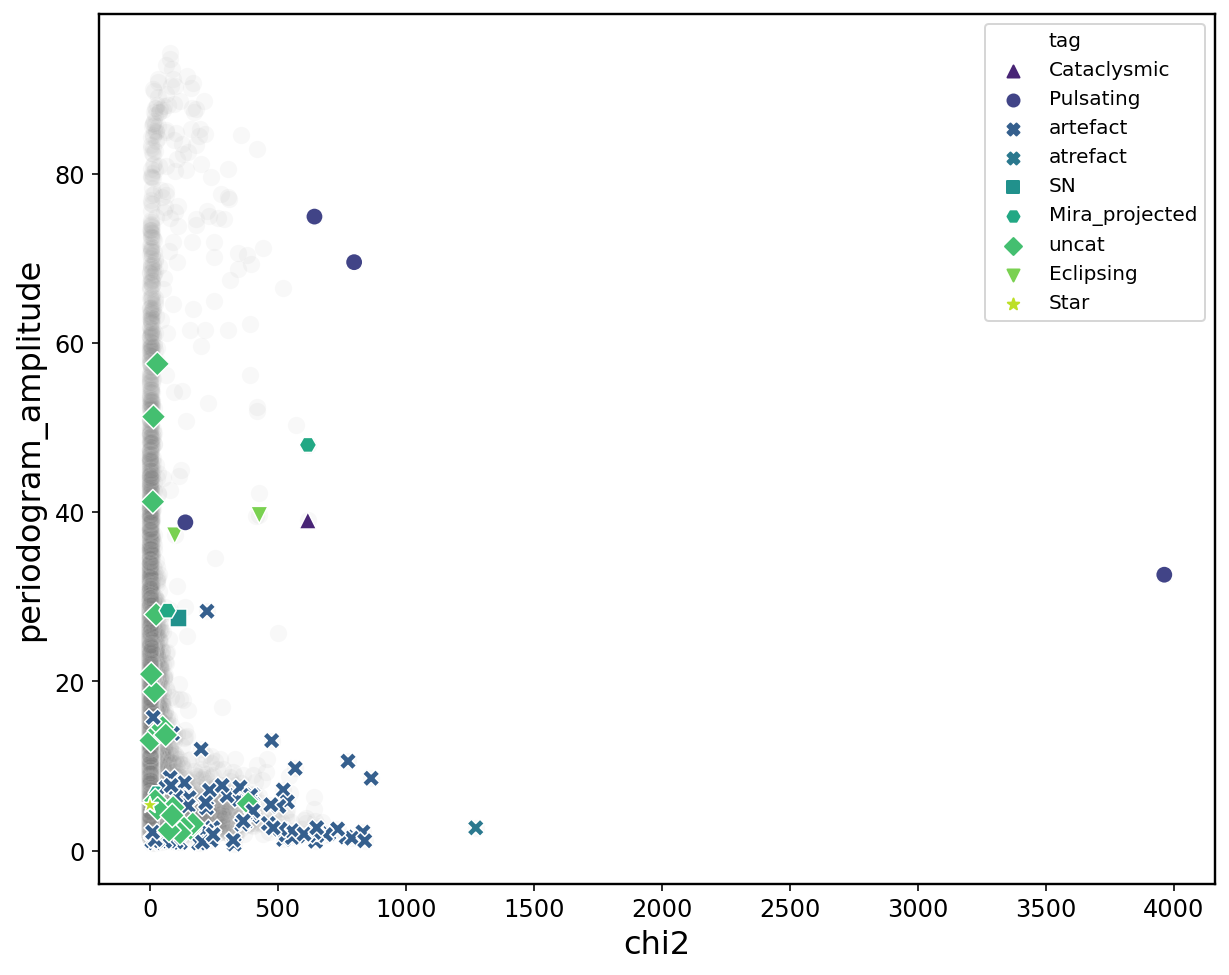

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

markers = {"artefact": "X", "atrefact": "X", "Var": "8", "Cl*": "s", "transient": "p", "uncat": "D", "RSG": "h", "Cataclysmic": "^",
           "Pulsating": "o", "Eclipsing": "v", "Star": "*", "Eruptive": "<", "Cepheid": ">", 
           "Mira_projected": "H", "SN": "s", "Сataclysmic":"^"}

sns.scatterplot(x="chi2", y="periodogram_amplitude", data=deep, marker="o", color='grey', s=75, alpha=0.05)
sns.scatterplot(x="chi2", y="periodogram_amplitude", data=deep_final_out, markers=markers, 
                style='tag', hue='tag', palette="viridis", s=75)

#set plot params
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12

plt.savefig('../figs/phase_spaces/chi2_periodamp_deep_vs_out.png', format='png', dpi=300, bbox_inches='tight')

# Disk

In [17]:
# Load Disk data

disk_oid, disk_features = load_dataset('../data/oid_disk.dat', '../data/feature_disk.dat', '../data/feature_disk.name')
disk = pd.DataFrame(disk_features, index=disk_oid)

# Lead full expert list of anomalies with comments, indexed by anomalies oid

disk_maria_list = pd.read_csv('../data/disk_maria.csv')
disk_maria_list = disk_maria_list.set_index('oid')

# From full data list (Disk), only select oid that match those in expert anomalies list

disk_out = disk.loc[disk_maria_list.index]
disk_out.to_csv('../data/disk_outliers_table.csv')

# Combine features data in anomalies with associated comments/tags
disk_final_out = pd.concat([disk_out, disk_maria_list], axis=1)
disk_final_out.to_csv('../data/disk_anomalies_table_with_tags.csv')
disk_final_out

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean,#,tag,tag_detailed,Comments
oid,,,,,,,,,,,,,,,,,,,,,
807202400045775,1.516500,0.421533,0.036496,0.380207,0.516975,1.068250e+10,1.112000,1.596399,-0.914131,-0.002833,...,230.174759,167.387314,0.202566,0.647290,0.924032,18.044008,28,artefact,ghost,dispersed LC
807208200053977,3.085500,0.011551,0.004950,0.069641,0.790791,2.860654e+10,0.160002,0.312000,163.241898,0.026083,...,13.139462,1158.178467,-12.198566,0.411021,0.553501,17.803911,34,artefact,ghost,3-point up
807202400045768,0.913000,0.443038,0.001582,0.391340,0.369262,1.329415e+10,0.910000,1.199499,-1.374448,-0.002423,...,306.213593,130.239761,-0.343107,0.475117,0.935053,18.171648,39,artefact,ghost,dispersed LC
807202400056014,1.113999,0.482428,0.004792,0.397819,0.372466,1.070364e+10,0.982000,1.339300,-1.323982,-0.000582,...,315.495453,162.616028,0.062962,0.522279,0.922299,17.970270,40,artefact,ghost,dispersed LC
807204300037369,0.929000,0.372659,0.016854,0.439098,0.238573,2.979068e+10,0.635000,0.981099,-1.000405,0.002320,...,300.100739,820.261108,-0.161254,0.389391,0.883957,16.207342,41,artefact,bright star,dispersed LC
807205300063328,1.028000,0.400915,0.010671,0.404611,0.350902,2.579429e+10,0.515501,0.734800,-0.585467,-0.000066,...,362.756165,373.031097,-0.211255,0.293465,0.873779,16.786951,44,artefact,bright star,dispersed LC
807211300045106,1.167000,0.399261,0.003697,0.404174,0.387329,2.593808e+10,0.578499,0.822001,-0.120556,-0.000633,...,292.669525,196.493637,0.213128,0.328564,0.896973,17.403746,45,artefact,bright star,dispersed LC
807204200066341,1.302000,0.431746,0.000000,0.351926,0.264929,1.427923e+10,1.208000,1.988001,-1.125845,-0.004067,...,191.757172,248.066422,-0.133297,0.706971,0.923196,17.811203,49,artefact,ghost,dispersed LC
807204200055876,1.445000,0.415435,0.003284,0.351177,0.255670,1.049687e+10,1.269499,2.084599,-1.106559,-0.003194,...,196.323166,189.758499,0.342563,0.757894,0.891571,17.840416,50,artefact,ghost,dispersed LC


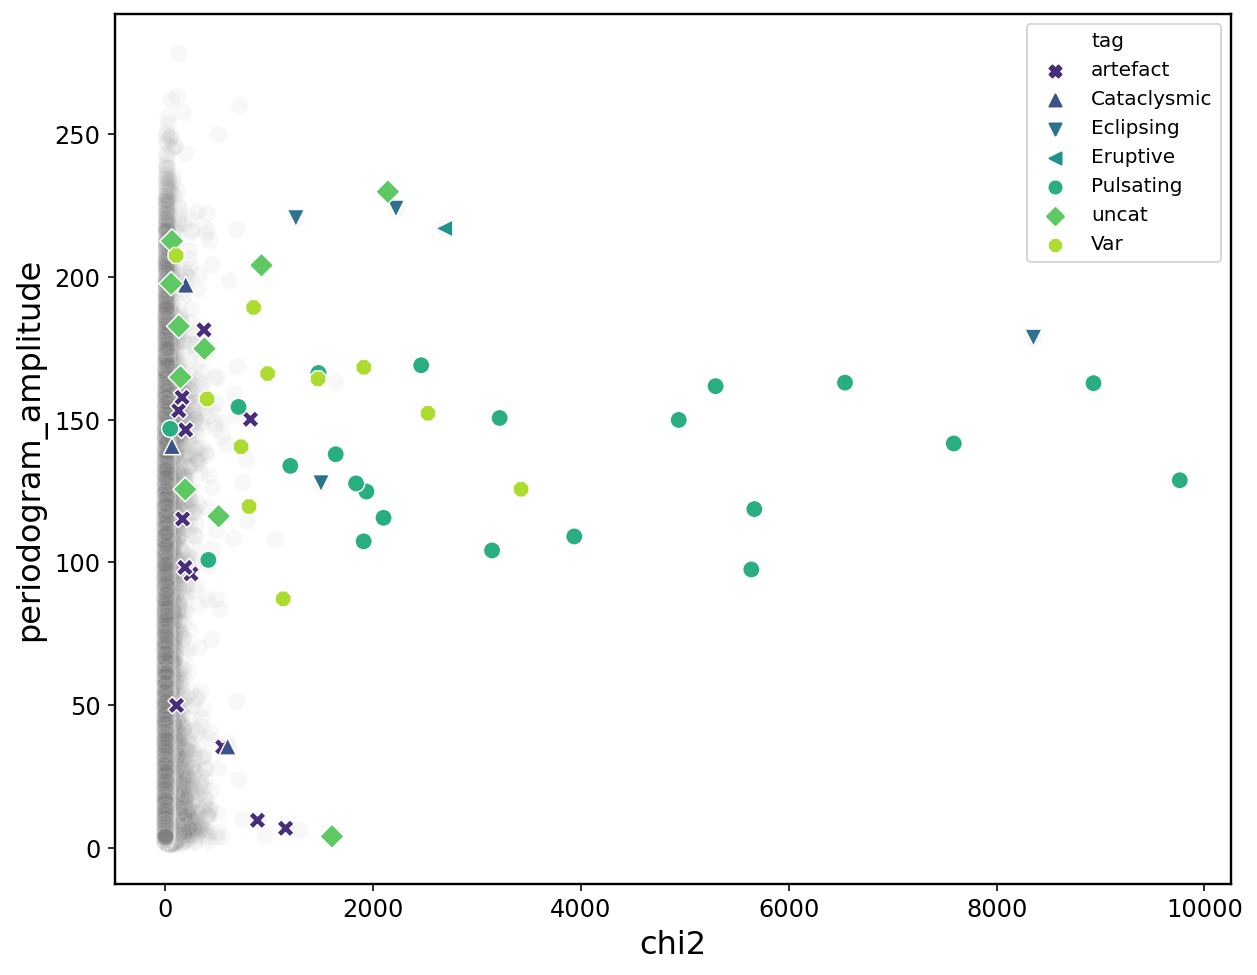

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

markers = {"artefact": "X", "atrefact": "X", "Var": "8", "Cl*": "s", "transient": "p", "uncat": "D", "RSG": "h", "Cataclysmic": "^",
           "Pulsating": "o", "Eclipsing": "v", "Star": "*", "Eruptive": "<", "Cepheid": ">", 
           "Mira_projected": "H", "SN": "s", "Сataclysmic":"^"}

sns.scatterplot(x="chi2", y="periodogram_amplitude", data=disk, marker="o", color='grey', s=75, alpha=0.05)
sns.scatterplot(x="chi2", y="periodogram_amplitude", data=disk_final_out, markers=markers, 
                style='tag', hue='tag', palette="viridis", s=75)

#set plot params
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12

plt.savefig('../figs/phase_spaces/chi2_periodamp_disk_vs_out.png', format='png', dpi=300, bbox_inches='tight')